# Recolección de datos

In [ ]:
# Exploración de los datos

# Limpieza y preparación

## 1. Importación de librerías
Para este primer paso importaremos las librerías que usaremos 

In [37]:
# Librería para comando de sistema
import os

# Librerías para manejo de datos
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Librerías de aprendizaje automático.
# Para realizar la separación del conjunto de aprendizaje en entrenamiento y test.
from sklearn.model_selection import train_test_split

# Para construir un modelo con el algoritmo de regresión lineal
from sklearn.linear_model import LinearRegression

# Para determinar el rendimiento del modelo con las métricas MSE, MAE y R2
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Para sacar un reporte estadístico que podemos usar para determinar las importancia de las variables explicativas.
import statsmodels.api as sm 

#Librerias para la transformación de los datos
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# Librerias para pipelines
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline

#
from sklearn.impute import SimpleImputer

## 2. Carga de los datos
Ahora cargaremos los datos

In [2]:
# Se cargan los datos completos y los de test
full_data = pd.read_csv('data/data.csv', sep=',', encoding = 'utf-8')
test_data = pd.read_csv('data/data_test.csv', sep=',', encoding = 'utf-8')

In [3]:
# Cantidad de datos y numero de variables
full_data.shape

(7115, 12)

In [4]:
full_data.head()

,Unnamed: 0,year,km_driven,owner,seller_type,seats,fuel,transmission,mileage,engine,max_power,selling_price
0,0,NaN,145500.0,NaN,Individual,5.0,Diesel,Manual,23.40,1248.0,74.00,5451.90
1,1,2014.0,120000.0,Second Owner,Individual,5.0,Diesel,Manual,21.14,1498.0,103.52,4482.68
2,2,2006.0,140000.0,Third Owner,Individual,5.0,Petrol,Manual,17.70,13524.0,78.00,1914.22
3,3,2010.0,127000.0,First Owner,Individual,5.0,Diesel,Manual,23.00,NaN,NaN,2725.95
4,4,2007.0,120000.0,First Owner,Individual,5.0,Petrol,Manual,16.10,1298.0,88.20,1574.99


In [5]:
# Para la preparación de los datos es mejor hacerlos en una copia
motoralpes = full_data

## 3. Exploración y descripción de los datos

In [6]:
# Perfilar los datos
motoralpes.describe()

,Unnamed: 0,year,km_driven,seats,mileage,engine,max_power,selling_price
count,7115.000000,6876.000000,6.917000e+03,7115.000000,6917.000000,6835.000000,6847.000000,6714.000000
mean,4069.227829,2013.980948,6.911118e+04,5.411103,19.523473,1835.489539,141.981595,11261.208041
std,2347.371729,3.852565,5.796521e+04,0.953555,4.241574,2363.919253,274.956684,40765.694516
min,0.000000,1994.000000,1.000000e+00,2.000000,0.000000,4.000000,1.070000,1.910000
25%,2033.000000,2012.000000,3.400000e+04,5.000000,16.800000,1197.000000,68.050000,3210.560000
50%,4081.000000,2015.000000,6.000000e+04,5.000000,19.330000,1248.000000,83.100000,5451.900000
75%,6103.500000,2017.000000,9.400000e+04,5.000000,22.320000,1597.000000,104.680000,8480.740000
max,8127.000000,2020.000000,2.360457e+06,14.000000,46.816000,19972.000000,1995.640000,598983.440000


In [7]:
# Tipos de datos
motoralpes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7115 entries, 0 to 7114
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     7115 non-null   int64  
 1   year           6876 non-null   float64
 2   km_driven      6917 non-null   float64
 3   owner          6876 non-null   object 
 4   seller_type    7115 non-null   object 
 5   seats          7115 non-null   float64
 6   fuel           7115 non-null   object 
 7   transmission   7115 non-null   object 
 8   mileage        6917 non-null   float64
 9   engine         6835 non-null   float64
 10  max_power      6847 non-null   float64
 11  selling_price  6714 non-null   float64
dtypes: float64(7), int64(1), object(4)
memory usage: 667.2+ KB


Explorando los datos, hallé que la primera columna corresponde a su índice, por lo que podemos quitarla más adelante.

In [8]:
# Calcula la cantidad de ausencias en los datos
motoralpes.isna().sum()

Unnamed: 0         0
year             239
km_driven        198
owner            239
seller_type        0
seats              0
fuel               0
transmission       0
mileage          198
engine           280
max_power        268
selling_price    401
dtype: int64

In [9]:
# Calcula la cantidad de duplicados que hay en los datos
motoralpes.duplicated(keep='first').sum()

0

## 4. Preparación de los datos

In [10]:
# Eliminación de las columans innecesarias
# La collumna de duenio, tipo de vendedor y la primera columna que es solo el índice
motoralpes = motoralpes.drop(['Unnamed: 0','seller_type'],axis=1)

In [11]:
motoralpes["owner"].replace(['Test Drive Car', 'First Owner', 'Second Owner', 'Third Owner', 'Fourth & Above Owner'],
                        [0, 1, 2, 3, 4], inplace=True)

In [12]:
motoralpes.dtypes

year             float64
km_driven        float64
owner            float64
seats            float64
fuel              object
transmission      object
mileage          float64
engine           float64
max_power        float64
selling_price    float64
dtype: object

In [13]:
name_cols_non_number = motoralpes.select_dtypes(include = ['object']).columns
name_cols_non_number = list(name_cols_non_number)
name_cols_non_number

['fuel', 'transmission']

In [14]:
# Ahora convertimos los datos no numericos a numericos
# Creamos un OneHotEncoder para transformar los valores
onehot_encoder = OneHotEncoder()

# fit the OneHotEncoder to the 'Time' and 'Day_of_Week' columns and transform the columns
motoralpes_encoded = onehot_encoder.fit_transform(motoralpes[['fuel', 'transmission']])

# create a new dataframe from the encoded columns and add column names
motoralpes_df = pd.DataFrame(motoralpes_encoded.toarray(), columns=onehot_encoder.get_feature_names_out(['fuel', 'transmission']))

# add the new encoded columns to the original dataframe and drop the original non-encoded columns
motoralpes_new = pd.concat([motoralpes, motoralpes_df], axis=1)
motoralpes_new.drop(['fuel', 'transmission'], axis=1, inplace=True)
motoralpes_new.sample(10)

,year,km_driven,owner,seats,mileage,engine,max_power,selling_price,fuel_CNG,fuel_Diesel,fuel_LPG,fuel_Petrol,transmission_Automatic,transmission_Manual
2112,2018.0,8000.0,1.0,5.0,18.60,1197.0,81.83,8965.35,0.0,0.0,0.0,1.0,0.0,1.0
5602,2010.0,90000.0,3.0,5.0,19.70,796.0,46.30,1635.57,0.0,0.0,0.0,1.0,0.0,1.0
365,2019.0,7032.0,1.0,5.0,19.00,1199.0,88.76,NaN,0.0,0.0,0.0,1.0,1.0,0.0
1251,2017.0,65000.0,2.0,5.0,25.50,1498.0,98.60,9328.81,0.0,1.0,0.0,0.0,0.0,1.0
1716,2014.0,90000.0,1.0,7.0,20.77,1248.0,1907.31,7874.97,0.0,1.0,0.0,0.0,0.0,1.0
548,2019.0,25000.0,1.0,5.0,23.95,998.0,67.05,4361.52,0.0,0.0,0.0,1.0,0.0,1.0
4664,2014.0,70000.0,2.0,5.0,25.20,1248.0,74.00,6905.74,0.0,1.0,0.0,0.0,0.0,1.0
4783,2010.0,426000.0,1.0,7.0,12.80,2494.0,102.00,11509.57,0.0,1.0,0.0,0.0,0.0,1.0
6158,2018.0,65000.0,1.0,5.0,25.40,1186.0,73.97,7269.20,0.0,1.0,0.0,0.0,0.0,1.0
1761,2014.0,50000.0,1.0,5.0,18.20,1199.0,82.40,3634.60,0.0,0.0,0.0,1.0,0.0,1.0


In [15]:
# Eliminar los registros vacios
motoralpes = motoralpes_new.dropna()
# Eliminar los registros duplicados
motoralpes = motoralpes.drop_duplicates()

In [16]:
# verificamos la cantidad de nulos
motoralpes.isna().sum()

year                      0
km_driven                 0
owner                     0
seats                     0
mileage                   0
engine                    0
max_power                 0
selling_price             0
fuel_CNG                  0
fuel_Diesel               0
fuel_LPG                  0
fuel_Petrol               0
transmission_Automatic    0
transmission_Manual       0
dtype: int64

In [17]:
# Verificamos la cantidad de duplicados
motoralpes.duplicated(keep='first').sum()

0

De esta forma, solo tenemos los datos referenetes a los componenentes del vehículo que pueden influir directamente en el precio. Ahora vamos a ver la correlación que tienen las variables entre si.

<AxesSubplot:>

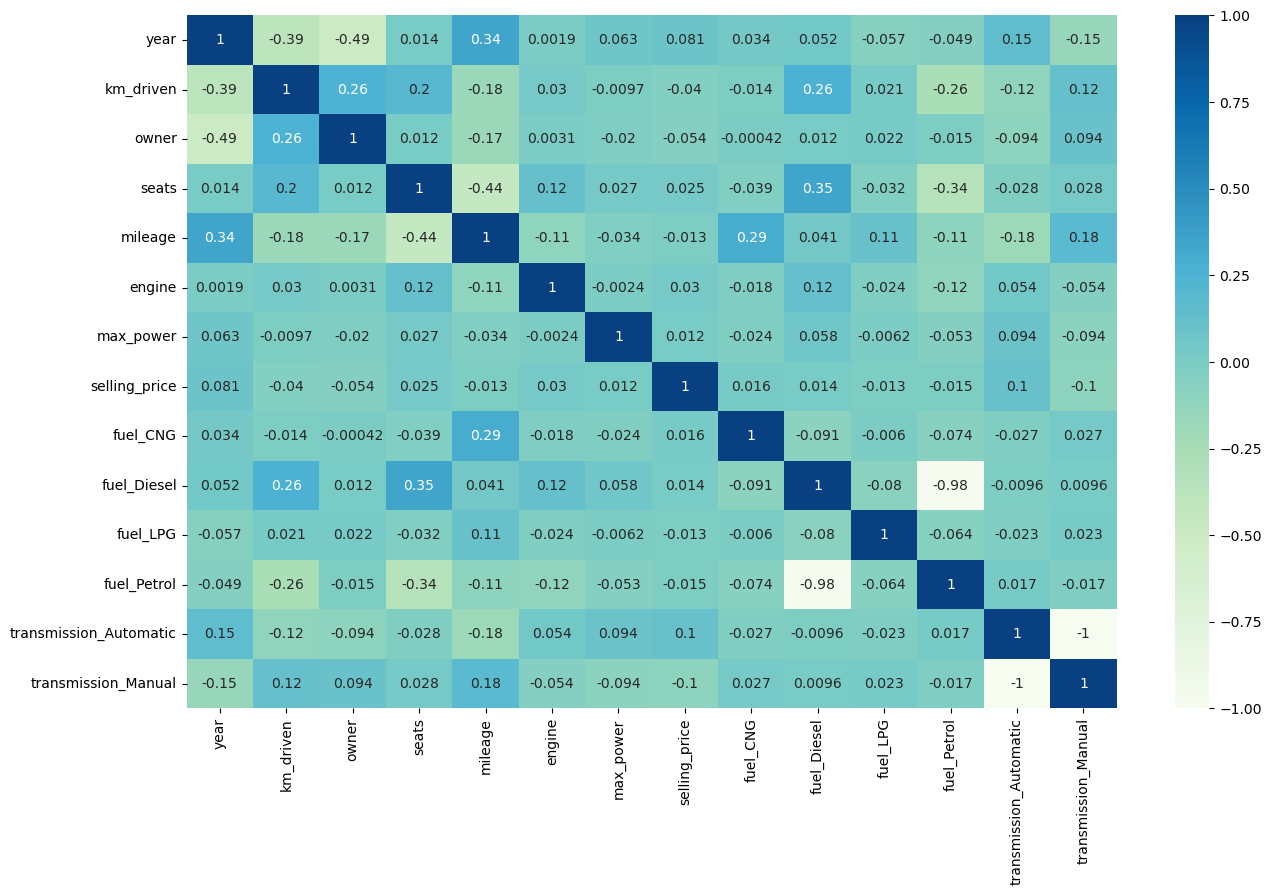

In [18]:
plt.figure(figsize=(15,9))
correlacion = motoralpes.corr()
sns.heatmap(correlacion, cmap = 'GnBu', annot= True)

<AxesSubplot:xlabel='owner'>

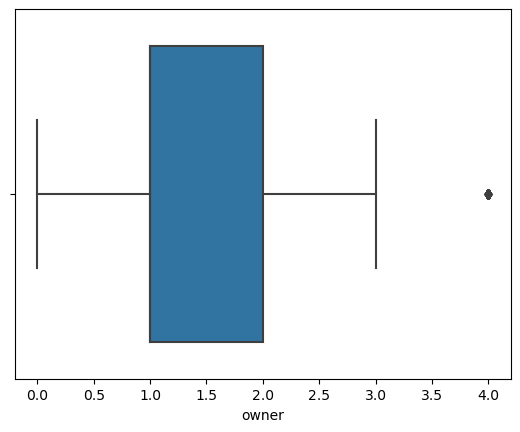

In [19]:
sns.boxplot(x=motoralpes['owner'], orient="h")

<AxesSubplot:xlabel='engine'>

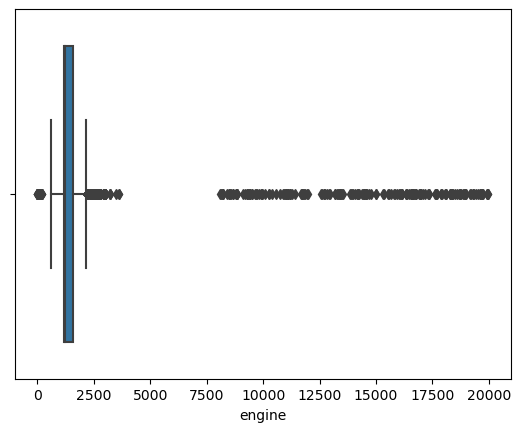

In [20]:
sns.boxplot(x=motoralpes['engine'], orient="h")

<AxesSubplot:xlabel='selling_price'>

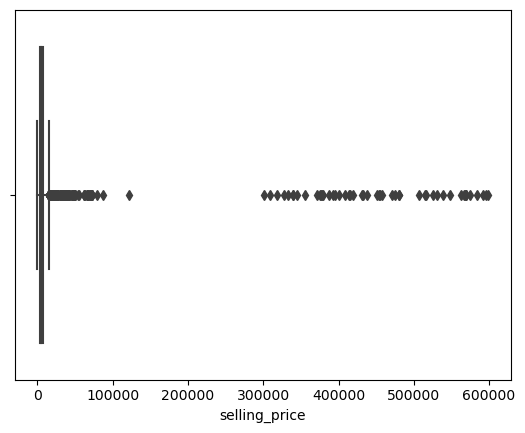

In [21]:
sns.boxplot(x=motoralpes['selling_price'], orient="h")

<AxesSubplot:xlabel='km_driven'>

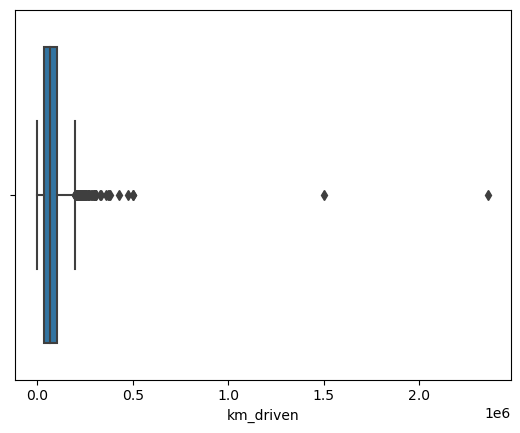

In [22]:
sns.boxplot(x=motoralpes['km_driven'], orient="h")

<AxesSubplot:xlabel='mileage'>

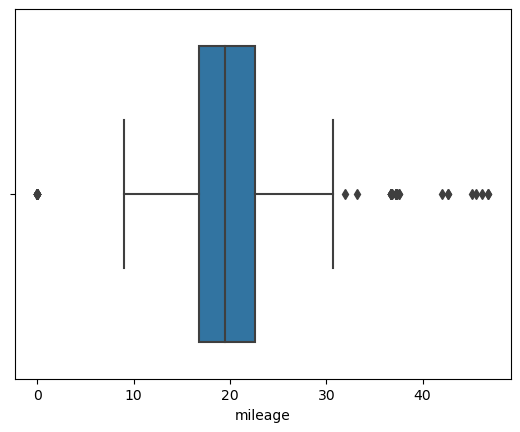

In [23]:
sns.boxplot(x=motoralpes['mileage'], orient="h")

<AxesSubplot:xlabel='max_power'>

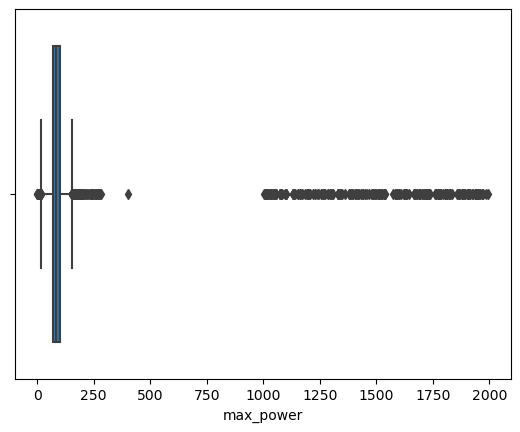

In [24]:
sns.boxplot(x=motoralpes['max_power'], orient="h")

# Modelado
ahora escogemos la variable objetivo y la sacamos de los datos

Ahora comenzaremos con la creación de los pipelines

In [25]:
class DeleteColumns (BaseEstimator, TransformerMixin):
    
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
         return X.drop(['Unnamed: 0','seller_type'], axis=1)

class OwnerReplace(BaseEstimator, TransformerMixin):
    
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        X["owner"].replace(['Test Drive Car', 'First Owner', 'Second Owner', 'Third Owner', 'Fourth & Above Owner'],
                           [0, 1, 2, 3, 4], inplace=True)
        return X
    

class CategoricToNumeric(BaseEstimator, TransformerMixin):
    
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        onehot_encoder = OneHotEncoder()
        X_encoded = onehot_encoder.fit_transform(X[['fuel', 'transmission']])

        X_df = pd.DataFrame(X_encoded.toarray(), columns=onehot_encoder.get_feature_names_out(['fuel', 'transmission']))

        X_new = pd.concat([X, X_df], axis=1)
        X = X_new.drop(['fuel', 'transmission'], axis=1, inplace=True)
        return X
    
    
class DropDup (BaseEstimator, TransformerMixin):
    
    def fit(self, X, y=None):
        return self
    
    def transform(self,X):
        return X.drop_duplicates()
    
    

In [26]:
# La variable objetivo es el precio de venta
y = motoralpes['selling_price']
# se elimina del conjunto de datos la variable objetivo
x = motoralpes.drop(['selling_price'], axis=1)

In [27]:
x.head()

,year,km_driven,owner,seats,mileage,engine,max_power,fuel_CNG,fuel_Diesel,fuel_LPG,fuel_Petrol,transmission_Automatic,transmission_Manual
1,2014.0,120000.0,2.0,5.0,21.14,1498.0,103.52,0.0,1.0,0.0,0.0,0.0,1.0
2,2006.0,140000.0,3.0,5.0,17.70,13524.0,78.00,0.0,0.0,0.0,1.0,0.0,1.0
4,2007.0,120000.0,1.0,5.0,16.10,1298.0,88.20,0.0,0.0,0.0,1.0,0.0,1.0
5,2017.0,45000.0,1.0,5.0,20.14,9638.0,81.86,0.0,0.0,0.0,1.0,0.0,1.0
6,2007.0,175000.0,1.0,5.0,24.22,1061.0,57.50,0.0,0.0,1.0,0.0,0.0,1.0


In [28]:
y.head()

1    4482.68
2    1914.22
4    1574.99
5    5330.75
6    1163.07
Name: selling_price, dtype: float64

## Preparación de los datos del test
Ahora realizaremos el proceso para el los datos de test

In [29]:
test_data.head()

,Unnamed: 0,year,km_driven,owner,seller_type,seats,fuel,transmission,mileage,engine,max_power
0,3105,2014.0,52442.0,Second Owner,Trustmark Dealer,5.0,Petrol,Manual,18.50,1198.0,86.8
1,4030,2016.0,40000.0,First Owner,Individual,7.0,Petrol,Automatic,10.75,2694.0,163.7
2,1656,2014.0,200000.0,First Owner,Individual,5.0,Diesel,Manual,25.10,1498.0,98.6
3,3580,2016.0,20000.0,First Owner,Individual,5.0,Petrol,Manual,20.40,1197.0,81.8
4,5725,NaN,140000.0,NaN,Individual,5.0,Diesel,Manual,25.10,1498.0,98.6


In [30]:
motoralpes_test = test_data
motoralpes_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 791 entries, 0 to 790
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    791 non-null    int64  
 1   year          764 non-null    float64
 2   km_driven     769 non-null    float64
 3   owner         764 non-null    object 
 4   seller_type   791 non-null    object 
 5   seats         791 non-null    float64
 6   fuel          791 non-null    object 
 7   transmission  791 non-null    object 
 8   mileage       769 non-null    float64
 9   engine        763 non-null    float64
 10  max_power     762 non-null    float64
dtypes: float64(6), int64(1), object(4)
memory usage: 68.1+ KB


In [40]:
first = Pipeline([
    ("dropper", DeleteColumns()),
    ("owner", OwnerReplace()),
    ("Numeric", CategoricToNumeric()),
    ("imputer", SimpleImputer(missing_values=np.nan, strategy='most_frequent'))
])

pipe.fit_transform(motoralpes_test)
motoralpes_test

ValueError: Expected 2D array, got scalar array instead:
array=nan.
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [36]:
dropper = DeleteColumns()
owner = OwnerReplace()
categoric = CategoricToNumeric()

categoric.fit_transform(owner.fit_transform(dropper.fit_transform(motoralpes_test)))
motoralpes

,year,km_driven,owner,seats,mileage,engine,max_power,selling_price,fuel_CNG,fuel_Diesel,fuel_LPG,fuel_Petrol,transmission_Automatic,transmission_Manual
1,2014.0,120000.0,2.0,5.0,21.14,1498.0,103.52,4482.68,0.0,1.0,0.0,0.0,0.0,1.0
2,2006.0,140000.0,3.0,5.0,17.70,13524.0,78.00,1914.22,0.0,0.0,0.0,1.0,0.0,1.0
4,2007.0,120000.0,1.0,5.0,16.10,1298.0,88.20,1574.99,0.0,0.0,0.0,1.0,0.0,1.0
5,2017.0,45000.0,1.0,5.0,20.14,9638.0,81.86,5330.75,0.0,0.0,0.0,1.0,0.0,1.0
6,2007.0,175000.0,1.0,5.0,24.22,1061.0,57.50,1163.07,0.0,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7107,2008.0,191000.0,1.0,5.0,17.92,1086.0,62.10,1453.84,0.0,0.0,0.0,1.0,0.0,1.0
7108,2013.0,50000.0,2.0,5.0,18.90,998.0,67.10,3149.99,0.0,0.0,0.0,1.0,0.0,1.0
7111,2007.0,119000.0,4.0,5.0,16.80,1493.0,110.00,1635.57,0.0,1.0,0.0,0.0,0.0,1.0
7112,2009.0,120000.0,1.0,5.0,19.30,1248.0,73.90,4628.06,0.0,1.0,0.0,0.0,0.0,1.0


In [38]:
motoralpes_test = motoralpes_test.drop(['Unnamed: 0','owner','seller_type'],axis=1)

In [24]:
motoralpes_test.head()

,year,km_driven,seats,fuel,transmission,mileage,engine,max_power
0,2014.0,52442.0,5.0,Petrol,Manual,18.50,1198.0,86.8
1,2016.0,40000.0,7.0,Petrol,Automatic,10.75,2694.0,163.7
2,2014.0,200000.0,5.0,Diesel,Manual,25.10,1498.0,98.6
3,2016.0,20000.0,5.0,Petrol,Manual,20.40,1197.0,81.8
4,NaN,140000.0,5.0,Diesel,Manual,25.10,1498.0,98.6


In [26]:
# Ahora convertimos los datos no numericos a numericos
# Creamos un OneHotEncoder para transformar los valores
onehot_encoder2 = OneHotEncoder()

# fit the OneHotEncoder to the 'Time' and 'Day_of_Week' columns and transform the columns
test_encoded = onehot_encoder2.fit_transform(motoralpes_test[['fuel', 'transmission']])

# create a new dataframe from the encoded columns and add column names
test_df = pd.DataFrame(test_encoded.toarray(), columns=onehot_encoder2.get_feature_names_out(['fuel', 'transmission']))

# add the new encoded columns to the original dataframe and drop the original non-encoded columns
test_new = pd.concat([motoralpes_test, test_df], axis=1)
test_new.drop(['fuel', 'transmission'], axis=1, inplace=True)
test_new.sample(10)

,year,km_driven,seats,mileage,engine,max_power,fuel_CNG,fuel_Diesel,fuel_LPG,fuel_Petrol,transmission_Automatic,transmission_Manual
74,2011.0,60000.0,5.0,18.60,1199.0,79.40,0.0,0.0,0.0,1.0,0.0,1.0
219,2017.0,28000.0,5.0,22.54,1396.0,88.73,0.0,1.0,0.0,0.0,0.0,1.0
769,1998.0,110000.0,5.0,13.10,1598.0,77.00,0.0,0.0,0.0,1.0,0.0,1.0
378,2017.0,110000.0,5.0,24.30,1248.0,88.50,0.0,1.0,0.0,0.0,0.0,1.0
446,2014.0,110000.0,5.0,13.49,2179.0,138.03,0.0,1.0,0.0,0.0,0.0,1.0
634,2009.0,113000.0,5.0,15.30,1193.0,65.30,0.0,0.0,0.0,1.0,0.0,1.0
441,2013.0,60000.0,5.0,18.60,1197.0,85.80,0.0,0.0,0.0,1.0,0.0,1.0
549,2017.0,60000.0,7.0,18.49,1493.0,100.00,0.0,1.0,0.0,0.0,0.0,1.0
705,2011.0,100000.0,5.0,23.59,1364.0,67.10,0.0,1.0,0.0,0.0,0.0,1.0
181,2016.0,120000.0,5.0,23.95,998.0,67.05,0.0,0.0,0.0,1.0,0.0,1.0


In [27]:
motoralpes_test.isna().sum()

year            27
km_driven       22
seats            0
fuel             0
transmission     0
mileage         22
engine          28
max_power       29
dtype: int64

In [28]:
# Eliminar los registros vacios
motoralpes_test = test_new.dropna()

In [29]:
motoralpes_test.isna().sum()

year                      0
km_driven                 0
seats                     0
mileage                   0
engine                    0
max_power                 0
fuel_CNG                  0
fuel_Diesel               0
fuel_LPG                  0
fuel_Petrol               0
transmission_Automatic    0
transmission_Manual       0
dtype: int64

In [30]:
motoralpes_test.duplicated(keep='first').sum()

40

In [31]:
# Eliminar los registros duplicados
motoralpes_test = test_new.drop_duplicates()

In [32]:
motoralpes_test.duplicated(keep='first').sum()

0

# Evaluación